In [4]:
pip uninstall gdown

Found existing installation: gdown 5.2.0
Uninstalling gdown-5.2.0:
  Would remove:
    /usr/local/bin/gdown
    /usr/local/lib/python3.11/dist-packages/gdown-5.2.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/gdown/*
Proceed (Y/n)? Y
  Successfully uninstalled gdown-5.2.0


In [5]:
pip install gdown

In [6]:
import gdown


folder_url = "https://drive.google.com/drive/folders/19QkjeXvAoBazNl8S2IP9RvBjunQjm9Rh"

try:

    gdown.download_folder(
        url=folder_url,
        remaining_ok=True
    )

    print("Download completed successfully!")
except Exception as e:
    print(f"An error occurred during download: {str(e)}")

Retrieving folder contents


Retrieving folder 1ux1YSviijxI5o0j1JabkiPh2ZIeiDKZ1 train.parquet
Retrieving folder 1Vq0SJHKwsahhyYWrJ9eU_BZIc2hOdGkI partition_id=0
Processing file 11TiXY_QtdyiI86kPRzYqOmTUVVRXsgUL part-0.parquet
Retrieving folder 1nCEsVjX5R3-WSbzSra5Qn6ANr8Iw2kjI partition_id=1
Processing file 1O1kVFKoocHT_teS0r5d8yLrJi0jhlBq3 part-1.parquet
Retrieving folder 1fn5pDTCsaN6zV9qfucYQ-r8xF5SWWPIE partition_id=2
Processing file 10raCKhXWbXZz_VmJsAPIZWAcf8_JBuwW part-2.parquet
Retrieving folder 1qtx5uvkskpa_3APTQbBPu21UW7h_QgAf partition_id=3
Processing file 1nZ58odfCV2qvcsHknZI_Tzzukr2UfNGm part-3.parquet
Retrieving folder 1_lhL_lNGZNcCokNb8NAOS4QTnOXPYKu8 partition_id=4
Processing file 1AkGzofAXy9AN-xg_4o6rQ44_7udzeFeJ part-4.parquet
Retrieving folder 1zJAl-9RNzEUEBRbJo4kZAA9ajIVDq77m partition_id=5
Processing file 16Otj5AgAQTGDnw71Mqrd9R9776hrxqIi part-5.parquet
Retrieving folder 185PCwANDOWM-L5dTCfgdTFsAoM25SiZp partition_id=6
Processing file 1X9M2AHn_R350P_T2yR7DRLrMY4kxmrme part-6.parquet
Retrieving

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=11TiXY_QtdyiI86kPRzYqOmTUVVRXsgUL
From (redirected): https://drive.google.com/uc?id=11TiXY_QtdyiI86kPRzYqOmTUVVRXsgUL&confirm=t&uuid=445722ff-fb33-46c3-bade-cb3fff9f415f
To: /content/Jane_Street_Data/train.parquet/partition_id=0/part-0.parquet
100%|██████████| 470M/470M [00:06<00:00, 75.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1O1kVFKoocHT_teS0r5d8yLrJi0jhlBq3
From (redirected): https://drive.google.com/uc?id=1O1kVFKoocHT_teS0r5d8yLrJi0jhlBq3&confirm=t&uuid=4459e467-39e0-40ed-bd4b-6796ec79b843
To: /content/Jane_Street_Data/train.parquet/partition_id=1/part-1.parquet
100%|██████████| 712M/712M [00:09<00:00, 72.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=10raCKhXWbXZz_VmJsAPIZWAcf8_JBuwW
From (redirected): https://drive.google.com/uc?id=10raCKhXWbXZz_VmJsAPIZWAcf8_JBuw

Download completed successfully!



Download completed


In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('ParquetLoader').getOrCreate()

folder_path = "/content/Jane_Street_Data/train.parquet/"

DF0 = spark.read.parquet(f'{folder_path}partition_id=0/part-0.parquet')
DF1 = spark.read.parquet(f'{folder_path}partition_id=1/part-1.parquet')
DF2 = spark.read.parquet(f'{folder_path}partition_id=2/part-2.parquet')
DF3 = spark.read.parquet(f'{folder_path}partition_id=3/part-3.parquet')
DF4 = spark.read.parquet(f'{folder_path}partition_id=4/part-4.parquet')
DF5 = spark.read.parquet(f'{folder_path}partition_id=5/part-5.parquet')
DF6 = spark.read.parquet(f'{folder_path}partition_id=6/part-6.parquet')
DF7 = spark.read.parquet(f'{folder_path}partition_id=7/part-7.parquet')
DF8 = spark.read.parquet(f'{folder_path}partition_id=8/part-8.parquet')
DF9 = spark.read.parquet(f'{folder_path}partition_id=9/part-9.parquet')

combined_df = DF0.union(DF1).union(DF2).union(DF3).union(DF4) \
                 .union(DF5).union(DF6).union(DF7).union(DF8).union(DF9)

print(f'Combined DataFrame row count: {combined_df.count()}')
combined_df.show(30)


Combined DataFrame row count: 47127338
+-------+-------+---------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+----------+----------+----------+-----------+------------+-----------+----------+-----------+----------+-----------+-----------+----------+----------+-----------+-----------+----------+-----------+----------+----------+------------+-----------+------------+----------+----------+----------+-------------+------------+----------+------------+------------+----------+-----------+----------+----------+-----------+----------+----------+----------+-----------+-------------+-----------+----------+-----------+----------+----------+-----------+----------+-----------+----------+----------+------------+-----------+----------+----------+----------+----------+----------+----------+-----------+------------+-----------+-----------+------------+-----------+----------+----------+-----------+------------+------------+------------

***SECTION 01 - Basic EDA***

In [8]:
from pyspark.sql.functions import col, sum, when, mean, stddev, corr, count
from pyspark.sql.types import NumericType
from pyspark.ml.feature import VectorAssembler, MinMaxScaler, Imputer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#show number of columns
len(combined_df.columns)

92

In [10]:
#I sampled the data for faster computation. this is for 5% of data
sampled_df = combined_df.sample(fraction=0.05, seed=42)

In [11]:
#drop other responders
sampled_df = sampled_df.drop("responder_0", "responder_1", "responder_2", "responder_3", "responder_4", "responder_5", "responder_7", "responder_8")

In [12]:
#check for string data type
categorical_cols = [col for col, dtype in sampled_df.dtypes if dtype == "string"]
print("Categorical Columns:", categorical_cols)

Categorical Columns: []


In [13]:
#check for missing data with 5% of dataset
null_counts = sampled_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in sampled_df.columns])
null_counts.show()

+-------+-------+---------+------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+
|date_id|time_id|symbol_id|weight|feature_00|feature_01|feature_02|feature_03|featur

In [14]:
#compute missing percentages
missing_counts = sampled_df.select([
    (sum(when(col(c).isNull() | (col(c) == "") | (col(c) == "NaN"), 1).otherwise(0)) / sampled_df.count()).alias(c)
    for c in sampled_df.columns
]).toPandas().T

#format
missing_counts.columns = ["Missing_Percentage"]
missing_counts = missing_counts.reset_index().rename(columns={"index": "Feature"})

#print missing data summary
print("Missing Data Summary (All Features):")
print(missing_counts.sort_values(by="Missing_Percentage", ascending=False))

Missing Data Summary (All Features):
        Feature  Missing_Percentage
31   feature_27            0.178705
30   feature_26            0.178705
35   feature_31            0.178705
25   feature_21            0.178705
43   feature_39            0.091421
..          ...                 ...
72   feature_68            0.000000
71   feature_67            0.000000
74   feature_70            0.000000
76   feature_72            0.000000
83  responder_6            0.000000

[84 rows x 2 columns]


In [15]:
#identify columns where missing percentage is >= 10%
high_missing_cols = missing_counts[missing_counts["Missing_Percentage"] >= 0.10]["Feature"].tolist()
# Drop columns with high missing data
clean_sampled_df = sampled_df.dropna(subset=high_missing_cols)

# Print the number of rows before and after cleaning
print(f"Rows before cleaning: {sampled_df.count()}")
print(f"Rows after cleaning: {clean_sampled_df.count()}")

Rows before cleaning: 2356232
Rows after cleaning: 1935162


In [16]:
#identify numeric columns
numeric_cols = [c for c, dtype in clean_sampled_df.dtypes if dtype in ("int", "double", "float")]

#compute mean values
fill_values = {c: clean_sampled_df.select(mean(col(c))).collect()[0][0] for c in numeric_cols}

#imputation
imputed_sampled_df = clean_sampled_df.fillna(fill_values)

*Correlation Visualization*

In [17]:
#looks for correlations with target variable. also fiters out features with no variance if needed
target_col = "responder_6"

numerical_cols = [c for c, dtype in imputed_sampled_df.dtypes if dtype in ("int", "double", "float") and c != target_col]

#compute standard deviation for all numeric columns
std_dev_df = imputed_sampled_df.select([stddev(col(c)).alias(c) for c in numerical_cols]).toPandas().T

#output
std_dev_df.columns = ["StdDev"]
std_dev_df = std_dev_df.reset_index().rename(columns={"index": "Feature"})

#filter out low-variance features
filtered_features = std_dev_df[std_dev_df["StdDev"] >= 0.01]["Feature"].tolist()

#compute correlation only for the filtered features
correlation_results = imputed_sampled_df.select([corr(c, target_col).alias(c) for c in filtered_features]).toPandas().T

#formatting for correlation results
correlation_results.columns = ["Correlation"]
correlation_results = correlation_results.reset_index().rename(columns={"index": "Feature"})

correlation_results = correlation_results.reindex(correlation_results["Correlation"].abs().sort_values(ascending=False).index)

#show
print("Filtered Feature-Target Correlations:")
print(correlation_results)

Filtered Feature-Target Correlations:
       Feature  Correlation
7   feature_06    -0.045594
5   feature_04    -0.031592
34  feature_36    -0.028471
8   feature_07    -0.028356
58  feature_60     0.022154
..         ...          ...
27  feature_29     0.000530
25  feature_27    -0.000417
61  feature_63     0.000379
73  feature_75     0.000238
62  feature_64     0.000089

[77 rows x 2 columns]


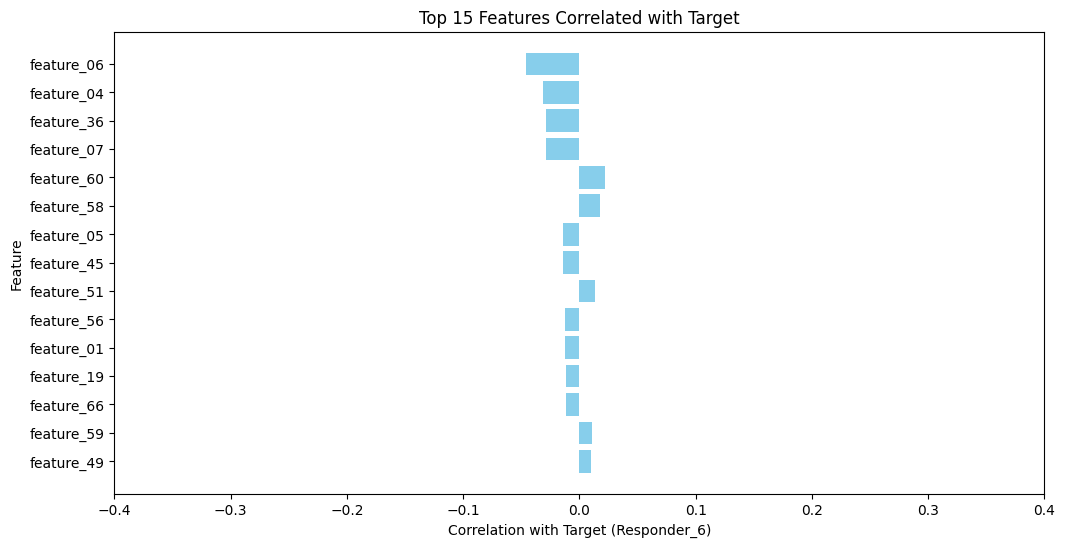

In [18]:
#barchart with features with most correlation with target variable.
#top 15 features by absolute correlation
top_corr_features = correlation_results.reindex(
    correlation_results["Correlation"].abs().sort_values(ascending=False).index
).head(15)

plt.figure(figsize=(12, 6))
plt.barh(top_corr_features["Feature"], top_corr_features["Correlation"], color="skyblue")
plt.xlabel("Correlation with Target (Responder_6)")
plt.ylabel("Feature")
plt.title("Top 15 Features Correlated with Target")
plt.gca().invert_yaxis()  #inverted to show strongest correlations at top
x_ticks = np.arange(-0.4, 0.5, 0.1)  #update major ticks
plt.xticks(x_ticks)
plt.show()

*Feature Importance*

Top Important Features:
       Feature  Importance
7   feature_06    0.267017
5   feature_04    0.110633
8   feature_07    0.094306
58  feature_60    0.073308
34  feature_36    0.068886
50  feature_52    0.036985
28  feature_30    0.033098
56  feature_58    0.031217
14  feature_16    0.029396
13  feature_15    0.027590
57  feature_59    0.024898
55  feature_57    0.024060
11  feature_13    0.018866
66  feature_68    0.016813
47  feature_49    0.014047
32  feature_34    0.013852
15  feature_17    0.012917
70  feature_72    0.010446
64  feature_66    0.008103
17  feature_19    0.007724


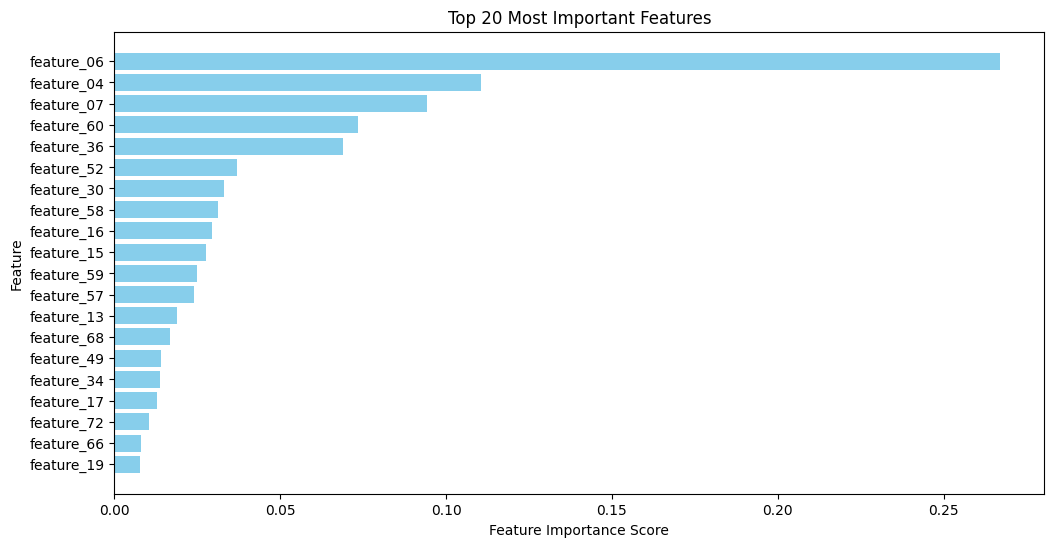

In [19]:
#target
target_col = "responder_6"

feature_cols = [c for c, dtype in imputed_sampled_df.dtypes if dtype in ("int", "double", "float") and c != target_col]

assembler_fi = VectorAssembler(inputCols=feature_cols, outputCol="features")

#initialize
rf_fi = RandomForestRegressor(featuresCol="features", labelCol=target_col, numTrees=20, maxDepth=4, seed=42) #had to reduce from 50 and 20 due to computation time

#modeling
pipeline_fi = Pipeline(stages=[assembler_fi, rf_fi])
model_fi = pipeline_fi.fit(imputed_sampled_df)

#feature importance
feature_importance = model_fi.stages[-1].featureImportances.toArray()
importance_df = pd.DataFrame({"Feature": feature_cols, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

#display
print("Top Important Features:")
print(importance_df.head(20))  #show top 20 most important features

#plot
plt.figure(figsize=(12, 6))
plt.barh(importance_df["Feature"][:20], importance_df["Importance"][:20], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features")
plt.gca().invert_yaxis()  # Invert to show most important at the top
plt.show()

*top 5 feature distributions*

Top 5 Important Features: ['feature_06', 'feature_04', 'feature_07', 'feature_60', 'feature_36']


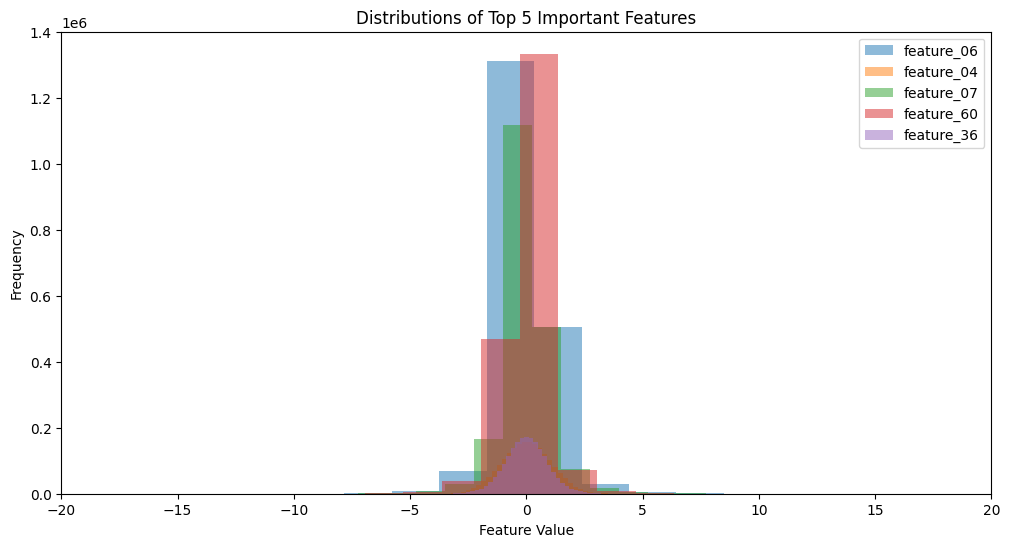

In [20]:
#top feature distributions
top_features = importance_df.head(5)["Feature"].tolist()
print("Top 5 Important Features:", top_features)

top_dist_df = imputed_sampled_df[top_features]

pandas_df = top_dist_df.toPandas()

plt.figure(figsize=(12, 6))
for feature in top_features:
    plt.hist(pandas_df[feature], bins=50, alpha=0.5, label=feature)

plt.xlim([-20, 20])

plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title("Distributions of Top 5 Important Features")
plt.legend()
plt.show()

In [21]:
# Select features with meaningful correlation to the target
corr_threshold = 0.01
selected_features_corr = correlation_results[abs(correlation_results["Correlation"]) >= corr_threshold]["Feature"].tolist()

# Select top 15 most important features from Random Forest analysis
top_n = 15
selected_features_importance = importance_df.head(top_n)["Feature"].tolist()

# Combine both selections (unique features)
final_selected_features = list(set(selected_features_corr + selected_features_importance))
print(f"Final Selected Features: {len(final_selected_features)}")

Final Selected Features: 22


*Normalization/Scaling*

In [22]:
feature_cols = [c for c in imputed_sampled_df.columns if c != "responder_6"]
assembler_scale = VectorAssembler(inputCols=feature_cols, outputCol="features_toscale")

#Min-Max Scaling
scaler = MinMaxScaler(inputCol="features_toscale", outputCol="scaled_features")
pipeline = Pipeline(stages=[assembler_scale, scaler])
scaled_sampled_df = pipeline.fit(imputed_sampled_df).transform(imputed_sampled_df)

#Drop unscaled features
scaled_sampled_df = scaled_sampled_df.drop("features")

***SECTION 2.0 - Modeling***

In [23]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from xgboost.spark import SparkXGBRegressor

In [24]:
#keep only the final selected features and the target variable
model_sampled_df = scaled_sampled_df.select(*final_selected_features, "responder_6")

#split the data into training and test sets
train_df, test_df = model_sampled_df.randomSplit([0.7, 0.3], seed=42)

In [25]:
#assembler reused for all models
assembler = VectorAssembler(inputCols=final_selected_features, outputCol="features")

#Initialize the Evaluator. This is reuseable
evaluator = RegressionEvaluator(labelCol="responder_6", predictionCol="prediction", metricName="r2") #reusable

*XGBoost Model*

In [26]:
xgb_regressor = SparkXGBRegressor(
    features_col="features",
    label_col="responder_6",
    num_round=50,
    num_workers=2
)

In [29]:
#create a pipeline with the assembler and XGBoost regressor
pipeline_xgb = Pipeline(stages=[assembler, xgb_regressor])

#Parameter Grid
paramGrid_xgb = (ParamGridBuilder()
             .addGrid(xgb_regressor.max_depth, [3, 5])
             .addGrid(xgb_regressor.learning_rate, [0.05, 0.1])
             .build())

#CrossValidator
crossval_xgb = CrossValidator(estimator=pipeline_xgb,
                          estimatorParamMaps=paramGrid_xgb,
                          evaluator=evaluator,
                          numFolds=3,  # Number of folds for cross-validation
                          parallelism=4)  # Number of parallel tasks

cvModel_xgb = crossval_xgb.fit(train_df)
best_model_predictions_xgb = cvModel_xgb.transform(test_df)
best_r2_score_xgb = evaluator.evaluate(best_model_predictions_xgb)
print(f"Best XGBoost Model R² Score: {best_r2_score_xgb:.4f}")

INFO:XGBoost-PySpark:Running xgboost-2.1.4 on 2 workers with
	booster params: {'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 3, 'objective': 'reg:squarederror', 'num_round': 50, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Running xgboost-2.1.4 on 2 workers with
	booster params: {'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 5, 'objective': 'reg:squarederror', 'num_round': 50, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Running xgboost-2.1.4 on 2 workers with
	booster params: {'device': 'cpu', 'learning_rate': 0.05, 'max_depth': 5, 'objective': 'reg:squarederror', 'num_round': 50, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Running xgboost-2.

Best XGBoost Model R² Score: 0.0129


In [30]:
best_model_xgb = cvModel_xgb.bestModel

# Extract the parameter map of the best model
best_model_params_XGB = best_model_xgb.stages[-1].extractParamMap()

# Display the best hyperparameters
for param, value in best_model_params_XGB.items():

    print(f"{param.name}: {value}")


enable_sparse_data_optim: False
featuresCol: features
features_cols: []
labelCol: responder_6
predictionCol: prediction
arbitrary_params_dict: {'num_round': 50}
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
device: cpu
early_stopping_rounds: None
eval_metric: None
feature_names: None
feature_types: None
feature_weights: None
force_repartition: False
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
iteration_range: None
learning_rate: 0.1
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 5
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: 100
num_parallel_tree: None
num_workers: 2
objective: reg:squarederror
random_state: None
reg_alpha: None
reg_lambda: None
repartition_random_shuffle: False
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: None
use_gpu

*Random Forest*

In [56]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(
    featuresCol="features",
    labelCol="responder_6",
    numTrees=20,
    maxDepth=3,
    subsamplingRate=0.5,
    seed=42
)

In [57]:
pipeline_rf = Pipeline(stages=[assembler, rf])

# Fit the pipeline to the training data
model_rf = pipeline_rf.fit(train_df)

# Make predictions on the test data
predictions_rf = model_rf.transform(test_df)

# Initialize the evaluator with R² as the metric
evaluator = RegressionEvaluator(labelCol="responder_6", predictionCol="prediction", metricName="r2")

# Evaluate the model's performance on the test data
r2_score_rf = evaluator.evaluate(predictions_rf)
print(f"Random Forest Test R² Score: {r2_score_rf:.4f}")

Random Forest Test R² Score: 0.0036
